Global Terrorism and Impact on Tourism

This analysis delves into different aspects of terrorism, like how often it happens over time, which countries have the highest casualty rates, what regions terrorist groups are active in, and how terrorism affects tourism. By carefully examining the data and doing statistical analysis, we've found important trends, like when and where terrorism is most common, and how it impacts tourism in certain countries.

Each part of the analysis gives us valuable information about terrorism, helping us understand its patterns and effects. We hope these insights can help make better decisions about security and policies to fight terrorism, ultimately making the world safer and more resilient.

In [1]:
# Load the dataset and preprocess it
import pandas as pd

In [2]:
# Load the dataset
terror = pd.read_csv('Resources/Terrorism_Dataset.csv', encoding='ISO-8859-1', low_memory=False)
terror.head()

iyear  imonth  iday             country                   region_txt  \
0   1970       7     2  Dominican Republic  Central America & Caribbean   
1   1970       0     0              Mexico                North America   
2   1970       1     0         Philippines               Southeast Asia   
3   1970       1     0              Greece               Western Europe   
4   1970       1     0               Japan                    East Asia   

            city   latitude   longitude                 attacktype1_txt  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

                 targtype1_txt                  target1  \
0  Private Citizens & Property             Julio Guzman   
1      Government (Diplomatic)  Nadine Chaval, daughter   
2          Journalists & Media                 Employee   
3      Government (Diplomatic)             U.S. Embassy   
4      Government (Diplomatic)           U.S. Consulate   

                                gname motive weaptype1_txt  nkill  nwound  
0                              MANO-D    NaN       Unknown    1.0     0.0  
1  23rd of September Communist League    NaN       Unknown    0.0     0.0  
2                             Unknown    NaN       Unknown    1.0     0.0  
3                             Unknown    NaN    Explosives    NaN     NaN  
4                             Unknown    NaN    Incendiary    NaN     NaN

In [3]:
# Rename columns for better readability
terror.rename(columns={
    'iyear': 'Year', 'imonth': 'Month', 'iday': 'Day', 'country': 'Country', 
    'region_txt': 'Region', 'attacktype1_txt': 'AttackType', 'target1': 'Target', 
    'nkill': 'Killed', 'nwound': 'Wounded', 'gname': 'Group', 
    'targtype1_txt': 'Target_type', 'weaptype1_txt': 'Weapon_type', 'motive': 'Motive'
}, inplace=True)

In [4]:
# Select relevant columns
terror = terror[['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude', 'longitude', 
                 'AttackType', 'Killed', 'Wounded', 'Target', 'Group', 'Target_type', 
                 'Weapon_type', 'Motive']]
terror.head()

Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   
3  1970      1    0              Greece               Western Europe   
4  1970      1    0               Japan                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target  \
0     1.0      0.0             Julio Guzman   
1     0.0      0.0  Nadine Chaval, daughter   
2     1.0      0.0                 Employee   
3     NaN      NaN             U.S. Embassy   
4     NaN      NaN           U.S. Consulate   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

  Weapon_type Motive  
0     Unknown    NaN  
1     Unknown    NaN  
2     Unknown    NaN  
3  Explosives    NaN  
4  Incendiary    NaN

In [5]:
len(terror)

181691

In [6]:
terror.loc[:, 'Casualties'] = terror['Killed'] + terror['Wounded']
terror.loc[:, 'Casualties']

0         1.0
1         0.0
2         1.0
3         NaN
4         NaN
         ... 
181686    3.0
181687    9.0
181688    0.0
181689    0.0
181690    0.0
Name: Casualties, Length: 181691, dtype: float64

In [7]:
# Iterate over each column and print its length
for column in terror:
    column_length = len(terror[column])
    print(f"Length of column '{column}': {column_length}")

Length of column 'Year': 181691
Length of column 'Month': 181691
Length of column 'Day': 181691
Length of column 'Country': 181691
Length of column 'Region': 181691
Length of column 'city': 181691
Length of column 'latitude': 181691
Length of column 'longitude': 181691
Length of column 'AttackType': 181691
Length of column 'Killed': 181691
Length of column 'Wounded': 181691
Length of column 'Target': 181691
Length of column 'Group': 181691
Length of column 'Target_type': 181691
Length of column 'Weapon_type': 181691
Length of column 'Motive': 181691
Length of column 'Casualties': 181691


Question-1

Incident Frequency Analysis:

In [8]:
# Check for any inconsistencies or invalid values in the date columns
terror['Year'].unique()
terror['Month'].unique()
terror['Day'].unique()


array([ 2,  0,  1,  3,  6,  8,  9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22,
       25, 26, 27, 28, 30, 31,  4,  7, 16, 17, 18, 23, 24,  5, 29],
      dtype=int64)

In [9]:
# Concatenate 'Year', 'Month', and 'Day' columns into a single date column
terror['Date'] = terror['Year'].astype(str) + '-' + terror['Month'].astype(str).str.zfill(2) + '-' + terror['Day'].astype(str).str.zfill(2)
terror['Date'] 

0         1970-07-02
1         1970-00-00
2         1970-01-00
3         1970-01-00
4         1970-01-00
             ...    
181686    2017-12-31
181687    2017-12-31
181688    2017-12-31
181689    2017-12-31
181690    2017-12-31
Name: Date, Length: 181691, dtype: object

In [10]:
# Convert the new date column into a datetime format
terror['Date'] = pd.to_datetime(terror['Date'], errors='coerce')

In [11]:
terror['Date']

0        1970-07-02
1               NaT
2               NaT
3               NaT
4               NaT
            ...    
181686   2017-12-31
181687   2017-12-31
181688   2017-12-31
181689   2017-12-31
181690   2017-12-31
Name: Date, Length: 181691, dtype: datetime64[ns]

In [12]:
# Drop rows with NaT (Not a Time) values, which indicate conversion errors
terror.dropna(subset=['Date'], inplace=True)

In [13]:
# Group by date and count the number of incidents for each date
incident_frequency = terror['Date'].value_counts().sort_index()
incident_frequency 

Date
1970-01-01     2
1970-01-02     3
1970-01-03     1
1970-01-06     1
1970-01-08     1
              ..
2017-12-27    24
2017-12-28    40
2017-12-29    15
2017-12-30    24
2017-12-31    25
Name: count, Length: 16070, dtype: int64

In [14]:
# Iterate over each column and print its length
for column in terror.columns:
    column_length = len(terror[column])
    print(f"Length of column '{column}': {column_length}")

Length of column 'Year': 180800
Length of column 'Month': 180800
Length of column 'Day': 180800
Length of column 'Country': 180800
Length of column 'Region': 180800
Length of column 'city': 180800
Length of column 'latitude': 180800
Length of column 'longitude': 180800
Length of column 'AttackType': 180800
Length of column 'Killed': 180800
Length of column 'Wounded': 180800
Length of column 'Target': 180800
Length of column 'Group': 180800
Length of column 'Target_type': 180800
Length of column 'Weapon_type': 180800
Length of column 'Motive': 180800
Length of column 'Casualties': 180800
Length of column 'Date': 180800


In [15]:
import plotly.graph_objs as go

# Create a trace for the incident frequency data
trace = go.Scatter(
    x = incident_frequency.index,  # Use the index (date) as x values
    y = incident_frequency.values,  # Use the incident frequency values as y values
    mode = 'lines',  # Plot as a line chart
    name = 'Incident Frequency'  # Name for the trace
)

# Create layout settings
layout = go.Layout(
    title = 'Incident Frequency Over Time',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Incidents'),
    showlegend=True,
    hovermode='closest',  # Show closest data point when hovering
    template='plotly_white'  # Use white background template
)

# Create the figure object
fig = go.Figure(data=[trace], layout=layout)

# Show the interactive plot
fig.show()



Analyzing the incident frequency over time graph from 1970 to 2017, we can make the following observations:

Overall Trend:

-   The graph shows a significant increase in incident frequency over time, particularly after the early 2000s.
-   There are fluctuations in incident frequency, indicating periods of higher and lower terrorist activity.
Key Periods:

-   1970s: The graph starts with a relatively low incident frequency, but there is a gradual increase throughout the decade.
-   1980s-1990s: The incident frequency continues to rise, with occasional spikes and dips.
-   Post-2000: There is a noticeable surge in terrorist incidents, with several peaks indicating periods of heightened activity.


Casualty Rate Examination:

In [16]:
# Calculate Casualty Rates
terror['Casualty_Rate'] = (terror['Killed'] + terror['Wounded']) / (terror['Killed'] + terror['Wounded'] + 1)
terror['Casualty_Rate'] 

0         0.50
5         0.00
6         0.00
7         0.00
8         0.00
          ... 
181686    0.75
181687    0.90
181688    0.00
181689    0.00
181690    0.00
Name: Casualty_Rate, Length: 180800, dtype: float64

In [41]:
# Aggregate by Country
casualty_rates_by_country = terror.groupby('Country')['Casualty_Rate'].mean().sort_values(ascending=False)[:100]
casualty_rates_by_country

Country
South Vietnam      0.987805
St. Lucia          0.933333
International      0.928571
North Korea        0.875000
Vatican City       0.750000
                     ...   
Libya              0.364769
Yugoslavia         0.362698
Slovak Republic    0.359259
Jordan             0.347331
East Timor         0.345238
Name: Casualty_Rate, Length: 100, dtype: float64

In [18]:
import plotly.graph_objs as go

# Create a trace for the bar chart
bar_trace = go.Bar(x=casualty_rates_by_country.index,
                   y=casualty_rates_by_country.values,
                   marker_color='skyblue')

# Create the layout for the bar chart
layout = go.Layout(title='Interactive Bar Chart of Casualty Rates by Country',
                   xaxis=dict(title='Country'),
                   yaxis=dict(title='Mean Casualty Rate'))

# Create the figure object
fig = go.Figure(data=[bar_trace], layout=layout)

# Show the interactive bar chart
fig.show()

Based on the graph depicting casualty rates by country:

Distribution Variation: The graph illustrates a wide variation in casualty rates across different countries, ranging from approximately 0.64 to 0.99, indicating diverse levels of vulnerability to terrorist violence globally.

High-Risk Countries: Countries such as South Vietnam and St. Lucia exhibit exceptionally high casualty rates, suggesting significant security challenges and vulnerabilities to terrorism within these nations. These high rates may reflect ongoing conflicts, historical tensions, or inadequate security measures.

Regional Patterns: Certain regions, like North Korea and Rwanda, demonstrate relatively high casualty rates compared to neighboring countries. This suggests localized factors such as political instability, historical conflicts, or the presence of active terrorist groups contributing to elevated casualty levels.

Security Measures: Countries with lower casualty rates, such as Turkmenistan and Vatican City, may indicate effective security measures, robust counter-terrorism strategies, or limited exposure to terrorist threats. Understanding the factors contributing to these lower rates can inform best practices for enhancing security and resilience against terrorism.

Policy Implications: The disparities in casualty rates underscore the importance of tailored counter-terrorism policies and interventions that address the specific challenges faced by each country. Policy responses should prioritize enhancing security capabilities, fostering regional cooperation, addressing root causes of extremism, and promoting social cohesion to mitigate the impact of terrorism on civilian populations.

Continuous Monitoring: Given the dynamic nature of terrorism and its evolving tactics, continuous monitoring and assessment of casualty rates are essential for identifying emerging threats, evaluating the effectiveness of counter-terrorism measures, and adapting policies to address evolving security challenges.

In summary, analyzing casualty rates by country provides valuable insights into the global landscape of terrorism and highlights the need for targeted and multifaceted approaches to enhance security, mitigate risks, and promote peace and stability worldwide.

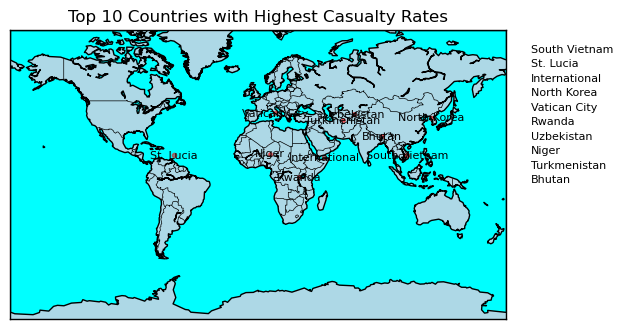

In [19]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# Create a Basemap instance
m = Basemap(projection='mill', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')

# Draw coastlines, countries, continents, and map boundary
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightblue', lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

# Get the top 10 countries with the highest casualty rates
top_countries = casualty_rates_by_country.head(10)

# Plot each country's casualty rate on the map
for country in top_countries.index:
    # Get the latitude and longitude of the country
    lat = terror[terror['Country'] == country]['latitude'].mean()
    lon = terror[terror['Country'] == country]['longitude'].mean()
    
    # Convert latitude and longitude to map coordinates
    x, y = m(lon, lat)
    
    # Plot the casualty rate as a scatter point
    size = top_countries.loc[country] * 10  # Adjust size for visibility
    m.scatter(x, y, s=size, color='red', alpha=0.5)
    
    # Adjust annotation position to avoid overlapping
    # Calculate displacement based on point density
    density = np.sqrt(len(terror[terror['Country'] == country]))
    displacement = 0.2 * density
    
    # Annotate the country name with adjusted position
    plt.text(x + displacement, y + displacement, country, fontsize=8, ha='center', va='center', color='black')

# Set plot title
plt.title('Top 10 Countries with Highest Casualty Rates')

# Annotate country names as legends on the side
for i, country in enumerate(top_countries.index):
    plt.text(1.05, 0.95 - i * 0.05, country, transform=plt.gca().transAxes, fontsize=8, ha='left', va='top', color='black')

# Show the plot
plt.show()


The top 10 countries with the highest casualty rates paint a diverse picture of regions affected by terrorism. 

From South Vietnam to North Korea, and from Vatican City to Rwanda, each nation faces unique challenges in combatting terrorism and mitigating its impact on civilian populations. 

While some countries may grapple with longstanding conflicts and insurgencies, others may experience sporadic terrorist incidents that nonetheless have significant consequences. 

In [20]:
import plotly.graph_objects as go

# Filter the top 14 terrorist groups
top_groups = terror[terror['Group'].isin(terror['Group'].value_counts()[:14].index)]

# Create a figure for the map plot
fig = go.Figure()

# Define colors for each group
colors = ['red', 'green', 'blue', 'yellow', '#800000', '#ff1100', '#8202fa', '#20fad9', '#ff5733', '#fa02c6',
          "#f99504", '#b3b6b7', '#8e44ad', '#1a2b3c']

# Iterate over each group and plot their activities
for group, color in zip(top_groups['Group'].unique(), colors):
    # Filter data for the specific group
    data_group = top_groups[top_groups['Group'] == group]
    
    # Create a scatter plot for the group
    fig.add_trace(go.Scattergeo(
        lon=data_group['longitude'],
        lat=data_group['latitude'],
        mode='markers',
        marker=dict(
            size=3,
            color=color,
            opacity=0.8
        ),
        name=group
    ))

# Update layout settings
fig.update_layout(
    title='Regional Activities of Terrorist Groups',
    geo=dict(
        resolution=110,
        showland=True,
        landcolor='lightblue',
        countrycolor='gray'
    )
)

# Show the interactive plot
fig.show()




The provided data showcases various terrorist groups and their associated regions. 

From the information provided, it seems that the activities of these groups are predominantly concentrated in the United States, with notable mentions of Uruguay, Italy, Ethiopia, and the Dominican Republic. This suggests a diverse range of geographic influences on terrorist activities, potentially influenced by historical, political, and social factors unique to each region. 

Threat Level Assessment:

In [21]:
# Select relevant columns
terror_threat = terror[['Country', 'Group']]

# Filter out rows where the Group column is not null (i.e., there is a known terrorist group)
terrorist_groups = terror_threat[terror_threat['Group'].notnull()]

# Group by country and count the number of unique terrorist groups operating in each country
terrorist_groups_count = terrorist_groups.groupby('Country')['Group'].nunique().sort_values(ascending=False)

# Display the top 10 countries with the highest number of unique terrorist groups
print("Top 10 Countries with Highest Number of Unique Terrorist Groups:")
print(terrorist_groups_count.head(10))

Top 10 Countries with Highest Number of Unique Terrorist Groups:
Country
India             300
United States     232
Italy             222
France            206
Greece            169
Lebanon           165
Pakistan          146
United Kingdom    109
Colombia          107
Iraq               98
Name: Group, dtype: int64


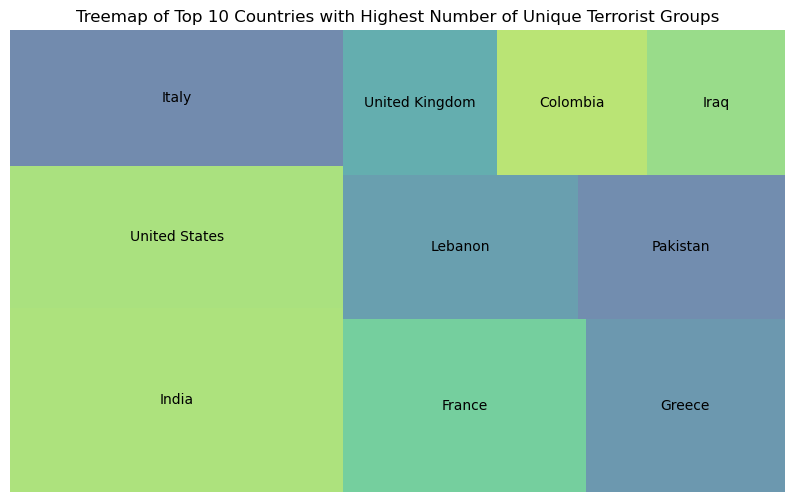

In [22]:
import squarify
import matplotlib.pyplot as plt

# Generate data
data = terrorist_groups_count.head(10)

# Plot treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=data.values, label=data.index, alpha=0.7)
plt.axis('off')
plt.title('Treemap of Top 10 Countries with Highest Number of Unique Terrorist Groups')
plt.show()


The data provided highlights the top 10 countries with the highest number of unique terrorist groups. 

India emerges as the country with the most diverse range of terrorist organizations, followed closely by the United States and Italy. 

This distribution suggests a significant presence of various extremist groups operating within these nations, potentially posing complex challenges for national security and counterterrorism efforts. 

Further analysis could explore the underlying socio-political factors contributing to the proliferation of terrorist organizations in these countries, facilitating more targeted and effective strategies for mitigating the threat posed by these groups.

In [25]:
terror.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Group',
       'Target_type', 'Weapon_type', 'Motive', 'Casualties', 'Date',
       'Casualty_Rate'],
      dtype='object')

Impact on Tourism 

In [26]:
# Step 1: Load the tourism dataset
tourism = pd.read_csv('Resources/tourism.csv')

# Renaming the 'Country' column to "Country"
tourism.rename(columns={'country': 'Country'}, inplace=True)


In [27]:
# Step 2: Merge the tourism dataset with the terrorism dataset on the 'Country' column
merged_data = pd.merge(terror, tourism, on='Country', how='left')

In [28]:
# Step 3: Clean up the merged dataset
# Check for missing values
print("Missing values in merged dataset:")
print(merged_data.isnull().sum())

Missing values in merged dataset:
Year                         0
Month                        0
Day                          0
Country                      0
Region                       0
city                       432
latitude                  4469
longitude                 4470
AttackType                   0
Killed                   10151
Wounded                  16128
Target                     633
Group                        0
Target_type                  0
Weapon_type                  0
Motive                  130527
Casualties               16683
Date                         0
Casualty_Rate            16683
tourists_in_millions    151476
receipts_in_billions    151476
receipts_per_tourist    151476
percentage_of_gdp       151476
dtype: int64


In [29]:
# Iterate over each column and print its length
for column in terror.columns:
    column_length = len(terror[column])
    print(f"Length of column '{column}': {column_length}")

Length of column 'Year': 180800
Length of column 'Month': 180800
Length of column 'Day': 180800
Length of column 'Country': 180800
Length of column 'Region': 180800
Length of column 'city': 180800
Length of column 'latitude': 180800
Length of column 'longitude': 180800
Length of column 'AttackType': 180800
Length of column 'Killed': 180800
Length of column 'Wounded': 180800
Length of column 'Target': 180800
Length of column 'Group': 180800
Length of column 'Target_type': 180800
Length of column 'Weapon_type': 180800
Length of column 'Motive': 180800
Length of column 'Casualties': 180800
Length of column 'Date': 180800
Length of column 'Casualty_Rate': 180800


In [30]:
# Remove rows with missing values in 'tourists_in_millions' column
merged_data.dropna(subset=['tourists_in_millions'], inplace=True)

In [31]:
merged_data.head()

Year  Month  Day        Country         Region     city   latitude  \
1  1970      1    1  United States  North America    Cairo  37.005105   
3  1970      1    2  United States  North America  Oakland  37.791927   
4  1970      1    2  United States  North America  Madison  43.076592   
5  1970      1    3  United States  North America  Madison  43.072950   
6  1970      1    1  United States  North America  Baraboo  43.468500   

    longitude                      AttackType  Killed  ...  \
1  -89.176269                   Armed Assault     0.0  ...   
3 -122.225906               Bombing/Explosion     0.0  ...   
4  -89.412488  Facility/Infrastructure Attack     0.0  ...   
5  -89.386694  Facility/Infrastructure Attack     0.0  ...   
6  -89.744299               Bombing/Explosion     0.0  ...   

            Target_type Weapon_type  \
1                Police    Firearms   
3             Utilities  Explosives   
4              Military  Incendiary   
5  Government (General)  Incendiary   
6              Military  Explosives   

                                           Motive Casualties       Date  \
1  To protest the Cairo Illinois Police Deparment        0.0 1970-01-01   
3                                             NaN        0.0 1970-01-02   
4     To protest the War in Vietnam and the draft        0.0 1970-01-02   
5     To protest the War in Vietnam and the draft        0.0 1970-01-03   
6                                             NaN        0.0 1970-01-01   

  Casualty_Rate  tourists_in_millions receipts_in_billions  \
1           0.0                  45.0                84.21   
3           0.0                  45.0                84.21   
4           0.0                  45.0                84.21   
5           0.0                  45.0                84.21   
6           0.0                  45.0                84.21   

   receipts_per_tourist  percentage_of_gdp  
1                1870.0                0.4  
3                1870.0                0.4  
4                1870.0                0.4  
5                1870.0                0.4  
6                1870.0                0.4  

[5 rows x 23 columns]

In [32]:
# Step 4: Analyze the impact of terrorism on tourism
# Group by country and calculate the total number of terrorist incidents and total tourists
tourism_impact = merged_data.groupby('Country').agg({'Year': 'count', 'tourists_in_millions': 'mean'}).reset_index()


In [46]:
tourism_impact.head(20)

Country  Total_Incidents  tourists_in_millions
0      Albania               80                   2.7
1    Australia              111                   1.8
2      Austria              114                  15.1
3      Belarus               13                   3.6
4      Belgium              152                   2.6
5     Bulgaria               52                   5.0
6     Cambodia              256                   1.3
7      Croatia               57                  21.6
8     Ethiopia              185                   0.5
9       France             2620                 117.1
10     Germany              732                  12.4
11      Greece             1271                   7.4
12   Hong Kong               26                   3.6
13     Hungary               45                  31.6
14   Indonesia              760                   4.1
15       Italy             1542                  38.4
16       Japan              391                   4.1
17  Luxembourg               16                   0.5
18    Malaysia               99                   4.3
19      Mexico              519                  51.1

In [34]:

# Calculate the correlation between the number of terrorist incidents and tourists
correlation = tourism_impact['Year'].corr(tourism_impact['tourists_in_millions'])
correlation

0.27199630050349566

In [35]:
tourism_impact.rename(columns={'Year': 'Total_Incidents'}, inplace=True)
tourism_impact.head()

Country  Total_Incidents  tourists_in_millions
0    Albania               80                   2.7
1  Australia              111                   1.8
2    Austria              114                  15.1
3    Belarus               13                   3.6
4    Belgium              152                   2.6

In [36]:

# Finding the country with the highest impact on tourism
country_highest_impact = tourism_impact.loc[tourism_impact['tourists_in_millions'].idxmax()]

# Finding the country with the lowest impact on tourism
country_lowest_impact = tourism_impact.loc[tourism_impact['tourists_in_millions'].idxmin()]

# Calculate the difference in tourism impact
difference = country_highest_impact['tourists_in_millions'] - country_lowest_impact['tourists_in_millions']

print("Country with the highest impact on tourism:", country_highest_impact['Country'])
print("Country with the lowest impact on tourism:", country_lowest_impact['Country'])
print("Difference in tourism impact:", difference)

Country with the highest impact on tourism: France
Country with the lowest impact on tourism: Moldova
Difference in tourism impact: 117.1


In [37]:
tourism_impact.dtypes

Country                  object
Total_Incidents           int64
tourists_in_millions    float64
dtype: object

In [38]:
import plotly.express as px

# Plot the scatter plot on a geographical map
fig = px.scatter_geo(tourism_impact, 
                     locations='Country',  # 'Country' column as location
                     locationmode='country names',  # Interpret locations as country names
                     color='tourists_in_millions',  # Color points based on tourists in millions
                     hover_name='Country',  # Display country names on hover
                     size='Total_Incidents',  # Size points based on total incidents
                     projection='natural earth',  # Map projection
                     title='Terrorist Incidents vs. Tourists by Country'
                    )

# Show the plot
fig.show()


The provided graph showcases the total incidents of terrorism and the number of tourists in millions for various countries. A correlation coefficient of approximately 0.272 indicates a weak positive correlation between terrorism incidents and tourist arrivals.

France stands out as the country with the highest impact on tourism, with 2620 reported terrorism incidents. Conversely, Moldova experiences the lowest impact on tourism, suggesting a safer destination with fewer reported incidents. The substantial difference in tourism impact between France and Moldova, amounting to 117.1 million tourists, underscores the significant influence of terrorism on tourist behavior and destination choices.

This analysis highlights the intricate relationship between terrorism and tourism, emphasizing the need for effective security measures and risk management strategies to safeguard tourist destinations and promote visitor confidence in the face of security threats.